# Exploratory Data Analysis - Customer Churn Prediction

This notebook performs comprehensive EDA on the Telco Customer Churn dataset.

## Objectives:
1. Load and understand the dataset structure
2. Analyze churn distribution
3. Explore feature distributions
4. Identify correlations and patterns
5. Document key insights for modeling

In [1]:
# Import libraries
import sys

sys.path.append("..")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.ingestion import DataLoader
from src.utils import get_config
from src.visualization import ChurnVisualizer

# Configure plotting
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("Set2")
%matplotlib inline

## 1. Load Dataset

In [2]:
# Load configuration
config = get_config()

# Initialize data loader
data_config = config.get("data", {})
data_loader = DataLoader(
    data_dir=config.get_data_path("raw_data_dir"), dataset_url=data_config.get("dataset_url")
)

# Load data
df = data_loader.load_data(filename=data_config.get("dataset_name", "Telco-Customer-Churn.csv"))

print(f"Dataset shape: {df.shape}")
df.head()

2025-10-03 14:17:49.203 | INFO     | src.utils.config_loader:_load_config:55 - Configuration loaded from D:\Projects\XAI Churn Predictor\config\config.yaml
2025-10-03 14:17:49.205 | DEBUG    | src.utils.config_loader:_setup_directories:86 - Required directories created/verified
2025-10-03 14:17:49.208 | INFO     | src.ingestion.data_loader:load_csv:121 - Loading data from D:\Projects\XAI Churn Predictor\data\raw\Telco-Customer-Churn.csv
2025-10-03 14:17:49.241 | INFO     | src.ingestion.data_loader:load_csv:125 - Data loaded successfully | Shape: (7043, 21) | Columns: 21


Dataset shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Dataset Overview

In [3]:
# Basic information
print("Dataset Information:")
print("=" * 50)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [4]:
# Statistical summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame(
    {
        "Column": missing.index,
        "Missing_Count": missing.values,
        "Missing_Percentage": missing_pct.values,
    }
)

missing_df[missing_df["Missing_Count"] > 0]

,Column,Missing_Count,Missing_Percentage


## 3. Churn Distribution Analysis

In [6]:
# Churn distribution
target_column = data_config.get("target_column", "Churn")

churn_counts = df[target_column].value_counts()
churn_pct = df[target_column].value_counts(normalize=True) * 100

print("Churn Distribution:")
print("=" * 50)
print(f"No Churn: {churn_counts.get('No', 0)} ({churn_pct.get('No', 0):.2f}%)")
print(f"Churn: {churn_counts.get('Yes', 0)} ({churn_pct.get('Yes', 0):.2f}%)")
print(f"\nChurn Rate: {churn_pct.get('Yes', 0):.2f}%")

Churn Distribution:
No Churn: 5174 (73.46%)
Churn: 1869 (26.54%)

Churn Rate: 26.54%


2025-10-03 14:18:35.846 | INFO     | src.visualization.plotter:plot_churn_distribution:56 - Plotting churn distribution


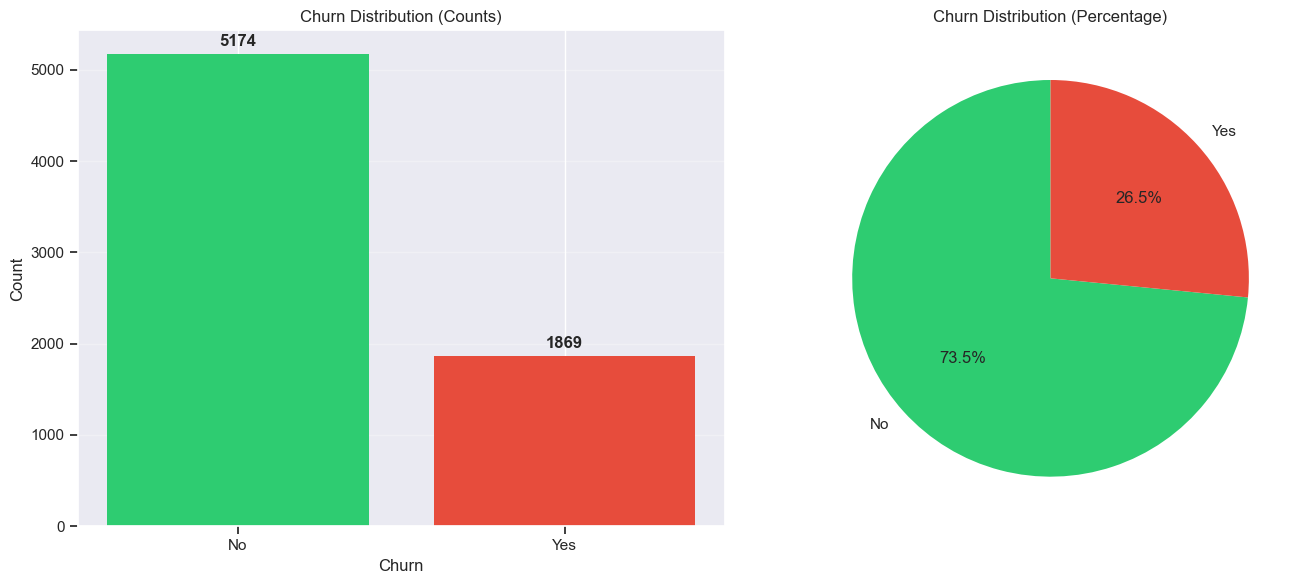

In [7]:
# Visualize churn distribution
visualizer = ChurnVisualizer()
visualizer.plot_churn_distribution(df, target_column=target_column)

## 4. Numeric Features Analysis

In [8]:
# Identify numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric features ({len(numeric_cols)}): {numeric_cols}")

Numeric features (3): ['SeniorCitizen', 'tenure', 'MonthlyCharges']


2025-10-03 14:18:47.862 | INFO     | src.visualization.plotter:plot_numeric_distributions:115 - Plotting distributions for 3 numeric features


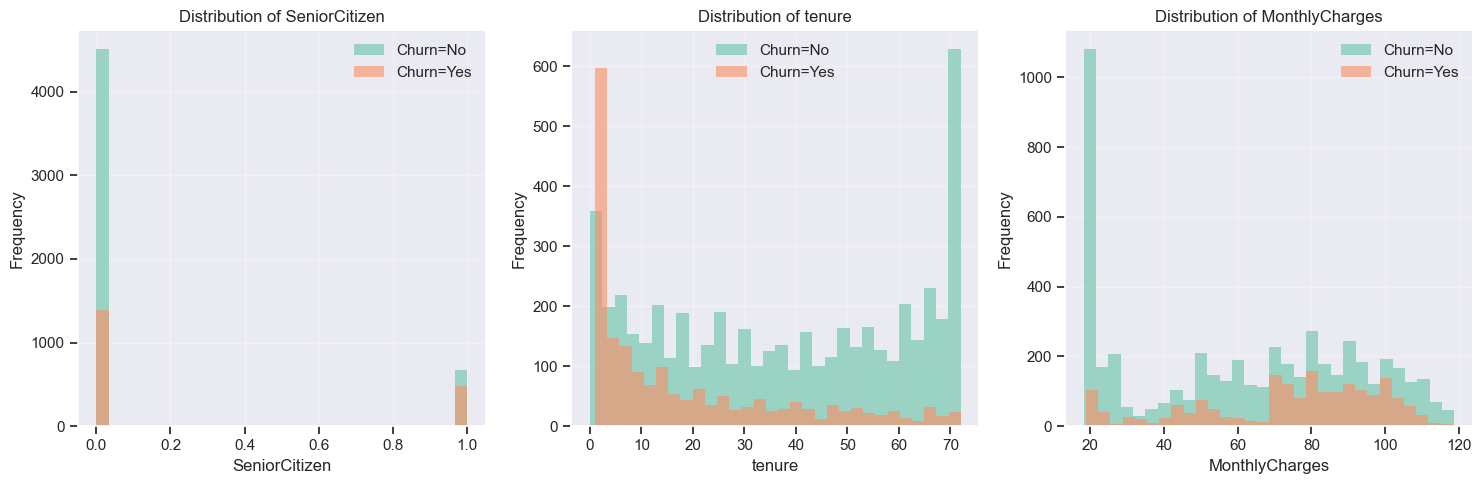

In [9]:
# Numeric features by churn status
if numeric_cols:
    visualizer.plot_numeric_distributions(df, numeric_cols, target_column=target_column)

2025-10-03 14:18:52.581 | INFO     | src.visualization.plotter:plot_correlation_heatmap:235 - Plotting correlation heatmap


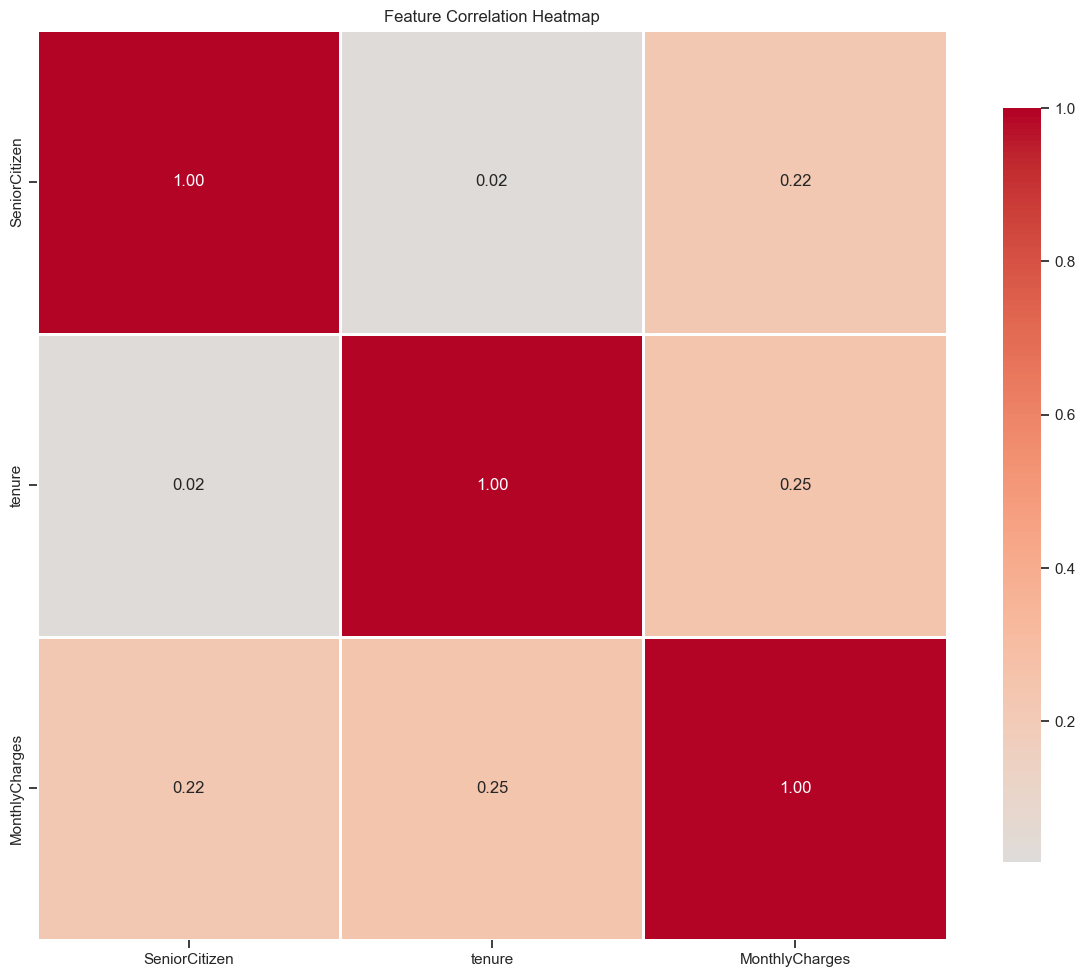

In [10]:
# Correlation heatmap
visualizer.plot_correlation_heatmap(df, numeric_cols)

## 5. Categorical Features Analysis

In [11]:
# Identify categorical features
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
if target_column in categorical_cols:
    categorical_cols.remove(target_column)
if "customerID" in categorical_cols:
    categorical_cols.remove("customerID")

print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")

Categorical features (16): ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


2025-10-03 14:19:07.106 | INFO     | src.visualization.plotter:plot_categorical_distributions:177 - Plotting distributions for 8 categorical features


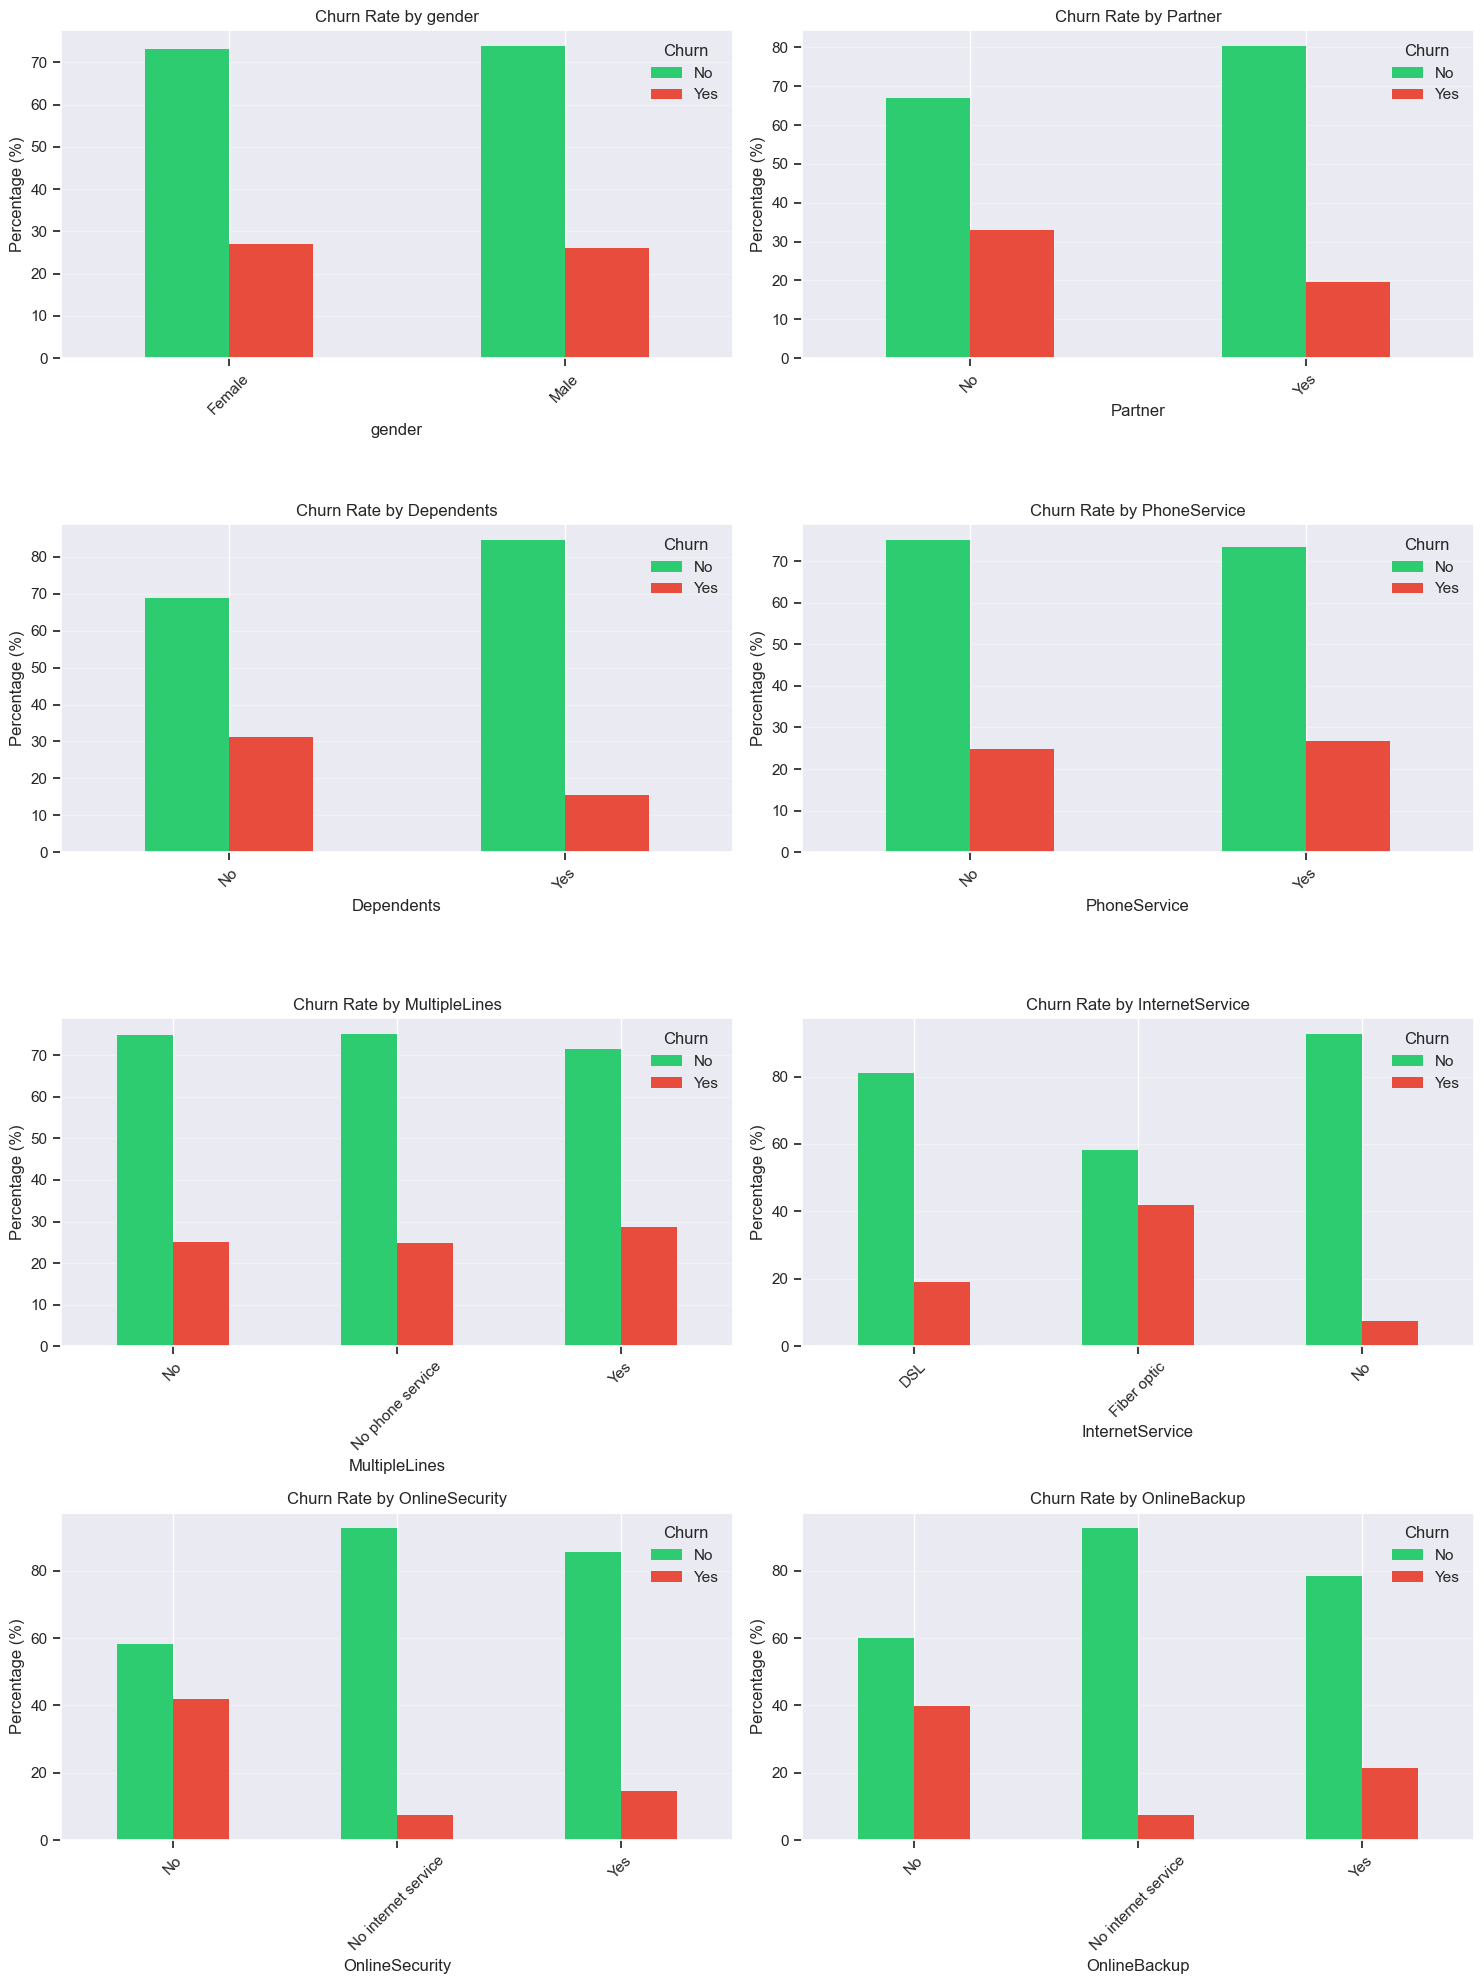

In [12]:
# Categorical distributions by churn
if categorical_cols:
    visualizer.plot_categorical_distributions(
        df,
        categorical_cols[:8],  # Limit for readability
        target_column=target_column,
    )

## 6. Key Insights

### Churn Rate
- Overall churn rate in the dataset
- Class imbalance considerations

### Numeric Features
- Tenure: Longer tenure typically associated with lower churn
- Monthly Charges: Higher charges may correlate with churn
- Total Charges: Related to tenure and monthly charges

### Categorical Features
- Contract type: Month-to-month contracts show higher churn
- Internet service: Fiber optic customers may have different patterns
- Payment method: Electronic check users may have higher churn

### Recommendations for Modeling
1. Handle class imbalance using SMOTE or similar techniques
2. Feature engineering: Consider tenure-based features
3. Encode categorical variables appropriately
4. Scale numeric features
5. Consider interaction features between contract type and services

## 7. Data Quality Check

In [13]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Check for inconsistencies in TotalCharges
if "TotalCharges" in df.columns:
    # TotalCharges should be numeric
    non_numeric = df[pd.to_numeric(df["TotalCharges"], errors="coerce").isna()]
    print(f"\nNon-numeric TotalCharges entries: {len(non_numeric)}")
    if len(non_numeric) > 0:
        print(non_numeric["TotalCharges"].value_counts())

Duplicate rows: 0

Non-numeric TotalCharges entries: 11
TotalCharges
    11
Name: count, dtype: int64


In [14]:
# Save processed insights
eda_summary = {
    "total_records": len(df),
    "total_features": len(df.columns),
    "churn_rate": churn_pct.get("Yes", 0),
    "numeric_features": len(numeric_cols),
    "categorical_features": len(categorical_cols),
    "missing_values": df.isnull().sum().sum(),
    "duplicates": duplicates,
}

print("\nEDA Summary:")
print("=" * 50)
for key, value in eda_summary.items():
    print(f"{key}: {value}")


EDA Summary:
total_records: 7043
total_features: 21
churn_rate: 26.536987079369588
numeric_features: 3
categorical_features: 16
missing_values: 0
duplicates: 0
